In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/burn_out_train.csv')
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [3]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [4]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,18590.000000,18590.000000,18590.000000,18590.000000
mean,2.179398,4.486552,5.732173,0.452444
std,1.133148,2.044848,1.920547,0.197848
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.320000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [9]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [13]:
df['new_date'] = pd.to_datetime(df['Date of Joining'])

In [14]:
df['year'] = df['new_date'].dt.year
df['month'] = df['new_date'].apply(lambda x : x.month)
df['day'] = df['new_date'].apply(lambda x : x.day)
df.head().T

,0,1,3,4,5
Employee ID,fffe32003000360033003200,fffe3700360033003500,fffe32003400380032003900,fffe31003900340031003600,fffe3300350037003500
Date of Joining,2008-09-30,2008-11-30,2008-11-03,2008-07-24,2008-11-26
Gender,Female,Male,Male,Female,Male
Company Type,Service,Service,Service,Service,Product
WFH Setup Available,No,Yes,Yes,No,Yes
Designation,2.0,1.0,1.0,3.0,2.0
Resource Allocation,3.0,2.0,1.0,7.0,4.0
Mental Fatigue Score,3.8,5.0,2.6,6.9,3.6
Burn Rate,0.16,0.36,0.2,0.52,0.29
new_date,2008-09-30 00:00:00,2008-11-30 00:00:00,2008-11-03 00:00:00,2008-07-24 00:00:00,2008-11-26 00:00:00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           18590 non-null  object        
 1   Date of Joining       18590 non-null  object        
 2   Gender                18590 non-null  object        
 3   Company Type          18590 non-null  object        
 4   WFH Setup Available   18590 non-null  object        
 5   Designation           18590 non-null  float64       
 6   Resource Allocation   18590 non-null  float64       
 7   Mental Fatigue Score  18590 non-null  float64       
 8   Burn Rate             18590 non-null  float64       
 9   new_date              18590 non-null  datetime64[ns]
 10  year                  18590 non-null  int64         
 11  month                 18590 non-null  int64         
 12  day                   18590 non-null  int64         
dtypes: datetime64[ns

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender_num'] = le.fit_transform(df['Gender'])
df['Company_Type_num'] = le.fit_transform(df['Company Type'])
df['WFH_S_Available_num'] = le.fit_transform(df['WFH Setup Available'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           18590 non-null  object        
 1   Date of Joining       18590 non-null  object        
 2   Gender                18590 non-null  object        
 3   Company Type          18590 non-null  object        
 4   WFH Setup Available   18590 non-null  object        
 5   Designation           18590 non-null  float64       
 6   Resource Allocation   18590 non-null  float64       
 7   Mental Fatigue Score  18590 non-null  float64       
 8   Burn Rate             18590 non-null  float64       
 9   new_date              18590 non-null  datetime64[ns]
 10  year                  18590 non-null  int64         
 11  month                 18590 non-null  int64         
 12  day                   18590 non-null  int64         
 13  Gender_num      

<Axes: >

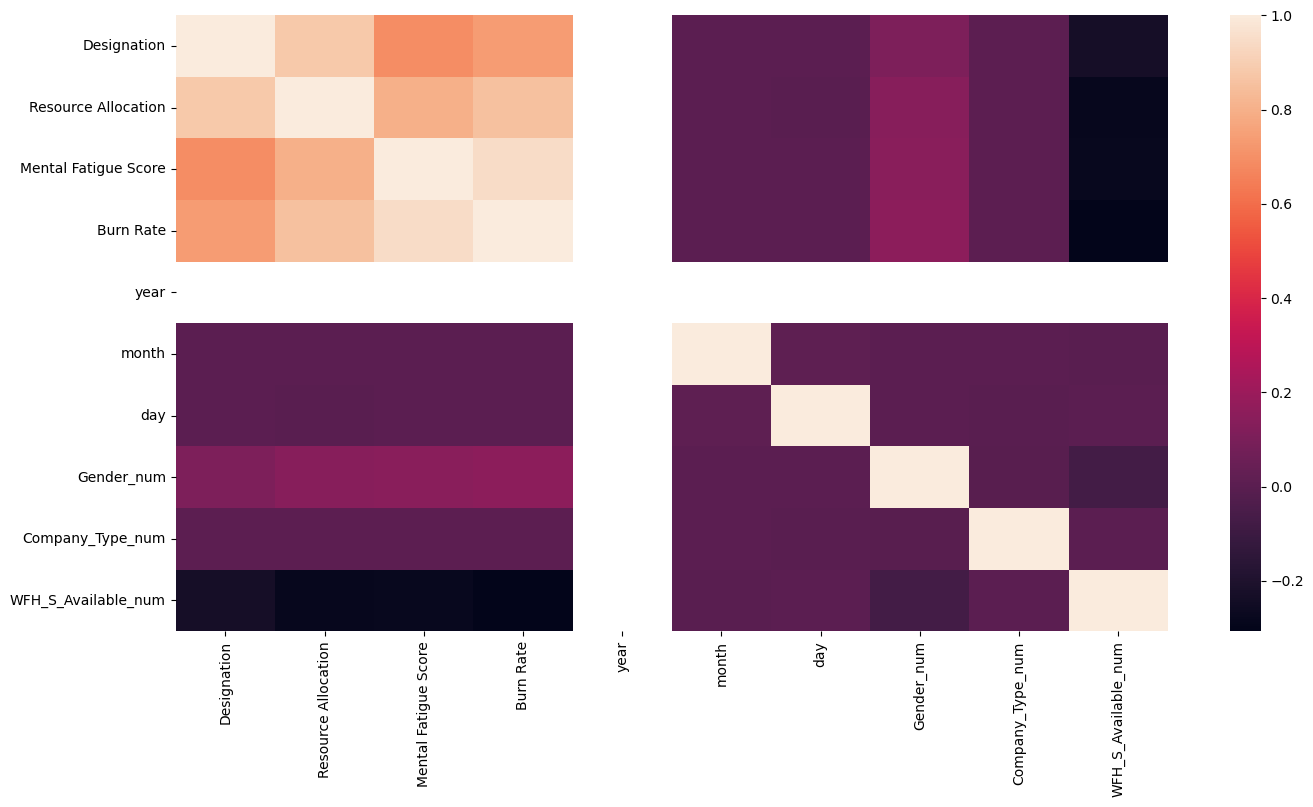

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax1 = plt.subplots()
fig.set_size_inches(16,8)
sns.heatmap(df.corr(),ax=ax1)

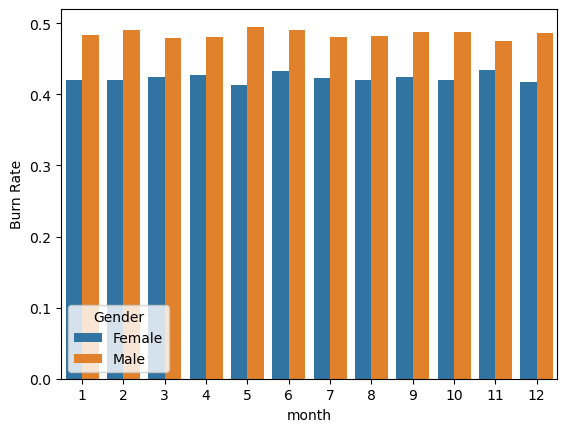

In [27]:
sns.barplot(ci=False,data=df,x='month',y='Burn Rate',hue='Gender')
plt.show()

In [28]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'new_date', 'year', 'month', 'day',
       'Gender_num', 'Company_Type_num', 'WFH_S_Available_num'],
      dtype='object')

<Axes: xlabel='month', ylabel='Designation'>

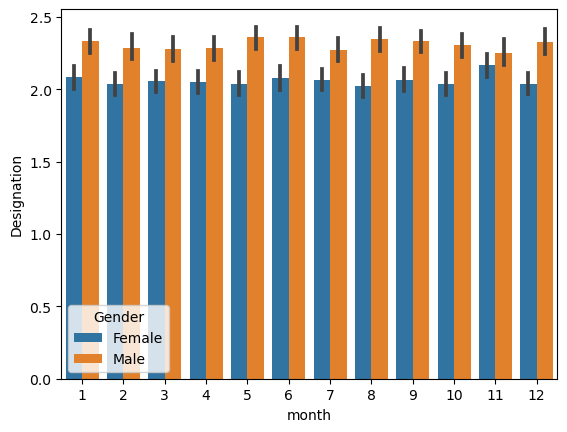

In [29]:
sns.barplot(data=df,x='month',y='Designation',hue='Gender')